In [41]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA



### 1. Reading Data

In [42]:
#Read Dataset
data_raw = pd.read_csv('data.csv')
data_raw.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,is_cyber_risk
0,1.067854,0.012939,-1.526958,-0.143941,-1.892614,0.582234,-2.381225,-0.945284,1.542425,-0.985864,NaN
1,0.578819,0.087829,-1.282481,-0.096164,-2.206364,0.569370,-2.377650,-0.683388,1.900271,-1.239804,NaN
2,0.963129,0.340988,-0.781892,0.083015,-2.134432,0.570730,-2.370634,-0.881871,1.573234,-1.224589,NaN
3,0.502945,-0.138565,-1.651106,0.098890,-1.874753,0.671973,-2.360452,-1.043909,1.387131,-1.014993,NaN
4,1.453607,0.490186,-0.855985,0.311923,-1.822408,0.682976,-2.360182,-0.924722,1.528471,-1.009642,NaN


In [43]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   var_1          30000 non-null  float64
 1   var_2          30000 non-null  float64
 2   var_3          30000 non-null  float64
 3   var_4          30000 non-null  float64
 4   var_5          30000 non-null  float64
 5   var_6          30000 non-null  float64
 6   var_7          30000 non-null  float64
 7   var_8          30000 non-null  float64
 8   var_9          30000 non-null  float64
 9   var_10         30000 non-null  float64
 10  is_cyber_risk  32 non-null     float64
dtypes: float64(11)
memory usage: 2.5 MB


In [44]:
data_raw.isnull().sum()
#There are no null values for the 10 variables - features

var_1                0
var_2                0
var_3                0
var_4                0
var_5                0
var_6                0
var_7                0
var_8                0
var_9                0
var_10               0
is_cyber_risk    29968
dtype: int64

In [45]:
data_raw.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,is_cyber_risk
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,32.0
mean,0.094988,0.243941,-0.236539,0.249357,-0.968800,0.391391,-0.333614,-0.723032,0.078175,-0.490883,1.0
std,1.323557,1.007845,1.109064,1.240071,1.012378,0.931455,1.471198,1.017907,1.613536,1.134503,0.0
min,-3.148193,-2.370041,-2.819406,-2.969403,-2.397298,-1.630564,-2.381225,-2.478175,-2.314054,-1.484182,1.0
25%,-1.222143,0.210519,-1.066990,-0.209032,-1.770394,-0.600924,-1.732959,-1.474892,-1.646483,-1.223910,1.0
50%,0.665354,0.658865,-0.620833,0.493764,-1.501054,0.900859,-0.717658,-0.700957,0.394494,-1.050496,1.0
75%,1.281579,0.904869,1.015198,0.955415,-0.360436,1.078921,1.315351,-0.519207,1.814356,-0.742747,1.0
max,2.758933,1.842439,1.957974,2.768892,1.695604,1.820250,2.610701,1.952875,2.382212,1.967871,1.0


### 2. Data Exploration

In [46]:
data = data_raw.copy()
data_risk = data[data['is_cyber_risk'] == 1]
data_status_unknown = data[data['is_cyber_risk'].isnull()]
data_risk.describe()
#Metrics for the flagged as cyber attacks data points

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,is_cyber_risk
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0
mean,0.186209,0.290897,-0.151311,0.079856,-0.680117,0.283554,-0.488605,-0.382166,0.308312,-0.434760,1.0
std,1.034411,0.688448,0.723414,0.854547,0.873579,0.688866,1.055981,0.654287,1.252697,0.770649,0.0
min,-2.524371,-1.669618,-1.715884,-1.972326,-2.086363,-1.328959,-1.978469,-1.835663,-1.859286,-1.366652,1.0
25%,-0.001026,-0.000473,-0.468582,-0.003696,-1.701009,-0.001147,-1.650064,-0.668387,-0.008677,-1.084632,1.0
50%,0.004579,0.008475,-0.006206,0.005385,-0.006723,0.007739,-0.007618,-0.197454,0.001371,-0.008592,1.0
75%,0.932175,0.740643,0.005345,0.540691,0.000756,0.944485,0.002003,-0.003191,1.751216,0.000178,1.0
max,2.022398,1.352151,1.302138,2.116821,0.761740,1.558989,2.035991,1.687132,2.104412,1.857508,1.0


In [47]:
data_risk

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,is_cyber_risk
1330,0.878051,0.494947,-1.071194,0.536757,-1.735955,0.897565,-1.978469,-0.660896,1.810841,-1.037477,1.0
1801,0.750952,0.323742,-1.299642,-0.191622,-2.086363,0.825674,-1.949766,-0.690858,1.859857,-1.187874,1.0
2599,0.700547,0.580528,-1.216279,0.386545,-1.774452,0.890297,-1.908047,-0.705892,1.738409,-1.065879,1.0
5034,1.127269,0.674111,-1.248758,0.234317,-1.925208,1.015209,-1.816739,-0.623048,1.923653,-1.151312,1.0
5646,1.412031,0.712581,-0.948881,0.894491,-1.461924,1.061735,-1.796796,-0.635415,1.789636,-0.914165,1.0
7444,2.022398,1.218687,-0.400664,0.806907,-1.702247,1.143007,-1.735055,-0.447819,2.104412,-1.076500,1.0
7686,1.094549,0.824830,-0.404460,0.552493,-1.877858,1.032946,-1.725885,-0.474928,2.043030,-1.192855,1.0
8661,1.639094,1.014128,-0.450185,0.502865,-1.700597,1.113817,-1.688229,-0.660411,1.815947,-1.038075,1.0
9823,1.427904,1.352151,-0.311033,0.835414,-1.707161,1.230456,-1.637342,-0.730247,1.685298,-1.109030,1.0
11594,1.397756,0.911762,-0.523771,0.732882,-1.602412,1.092394,-1.486128,-0.385670,2.060060,-1.057410,1.0


Taking a look at the cyber attack data points above, around half of those have all the values of the 10 variables very close to 0.

In [48]:
data_raw.iloc[1329:1340]


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,is_cyber_risk
1329,1.115954,0.464999,-0.649380,0.113400,-1.974261,0.852741,-1.978547,-0.745319,1.755096,-1.159916,NaN
1330,0.878051,0.494947,-1.071194,0.536757,-1.735955,0.897565,-1.978469,-0.660896,1.810841,-1.037477,1.0
1331,1.190968,0.474597,-1.310926,0.049698,-1.894057,0.780530,-1.978382,-0.725375,1.750176,-1.091354,NaN
1332,1.033361,0.489968,-0.885163,0.099323,-1.976762,0.966551,-1.978348,-0.824137,1.709802,-1.141830,NaN
1333,0.874871,0.435768,-0.956851,0.311985,-1.918926,0.745358,-1.978236,-0.526056,1.961252,-1.158391,NaN
1334,0.692315,0.284744,-1.294728,-0.090982,-2.010912,0.825042,-1.978208,-0.762968,1.747663,-1.153223,NaN
1335,0.883903,0.337496,-1.042346,0.631694,-1.546295,0.867737,-1.978097,-0.740814,1.657457,-0.912475,NaN
1336,1.317051,0.743848,-0.712785,0.501705,-1.767415,0.877547,-1.978022,-0.729826,1.716574,-1.085729,NaN
1337,0.802498,0.557384,-0.964214,0.063954,-2.005435,0.966136,-1.977902,-0.854152,1.677196,-1.172214,NaN
1338,1.373402,0.728511,-0.593928,0.198309,-1.944184,0.869047,-1.977846,-0.656536,1.878941,-1.150382,NaN


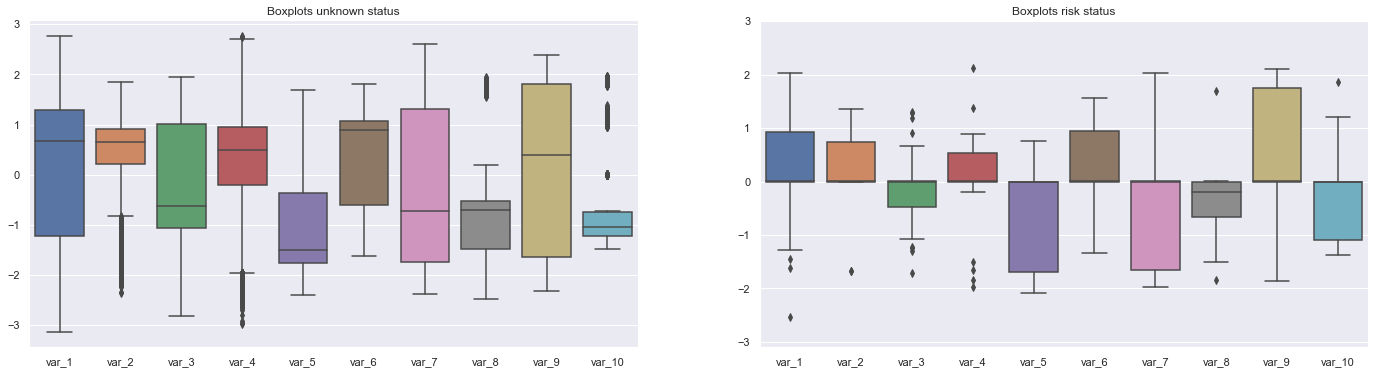

In [49]:
data = data_raw.copy()
data['is_cyber_risk'].fillna(0, inplace=True)


fig, ax = plt.subplots(1,2)
plt.ylim(-3.1, 3)

sns.set(rc={'figure.figsize':(24,6)})
sns.boxplot(data=data_status_unknown.drop('is_cyber_risk', axis=1), ax=ax[0]).set_title('Boxplots unknown status')
sns.boxplot(data = data_risk.drop('is_cyber_risk', axis=1), ax = ax[1]).set_title('Boxplots risk status')
sns.despine()


From the boxplots above for the unknown_stats data points and the cyber attacks, no clear relationship can be derived for the individual variables. One observation is that variables var_8 and var_10 tend to have higher values during cyber attacks. Of course this relies on very few observations (32 identified cyber attacks) so it is difficult to generalize.

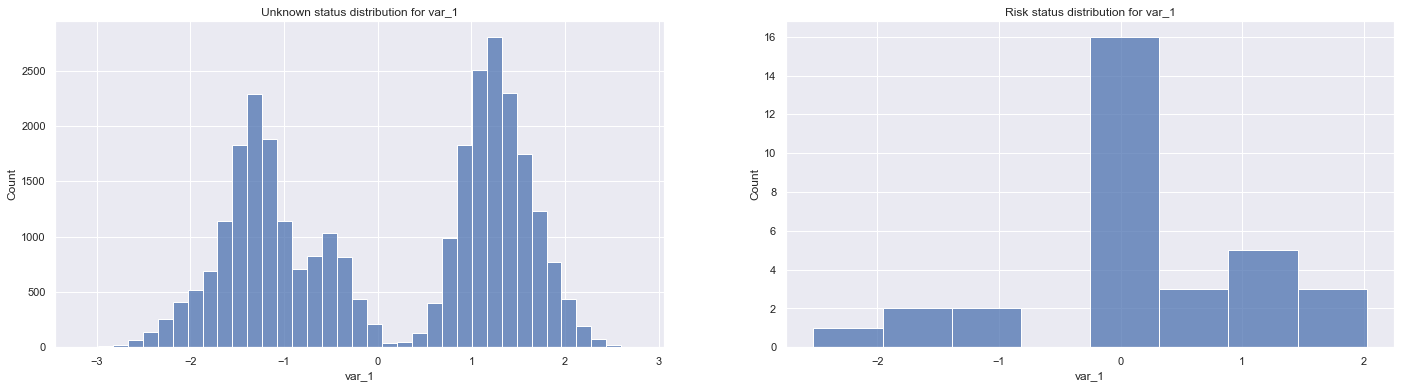

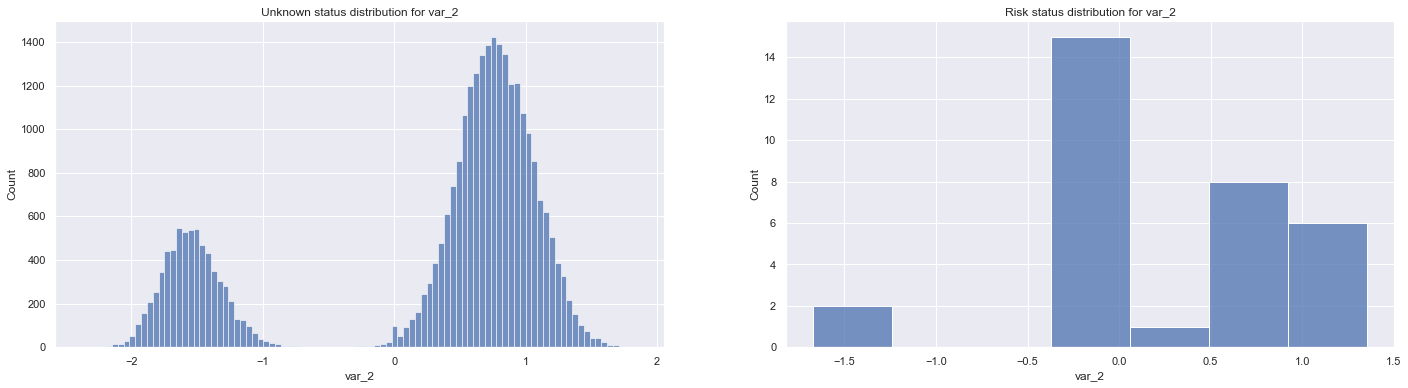

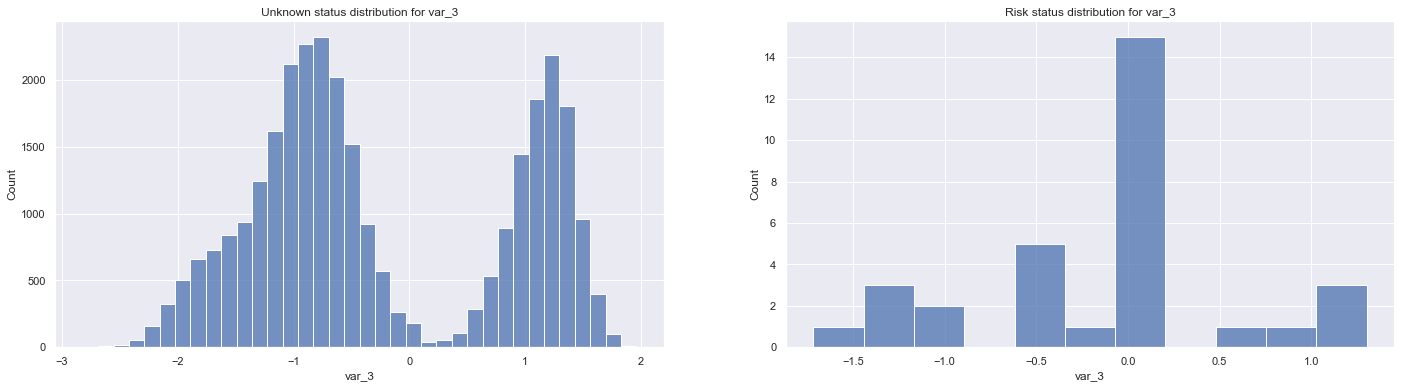

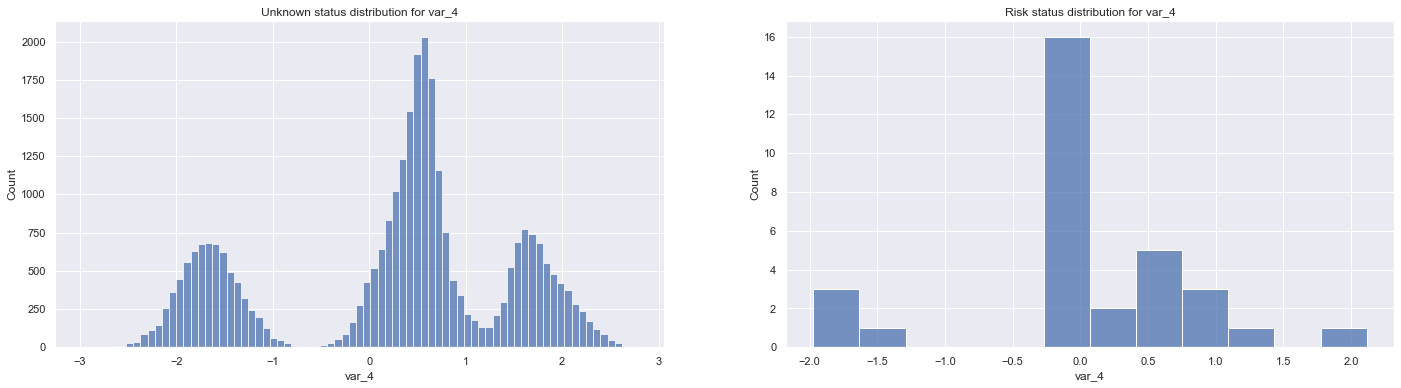

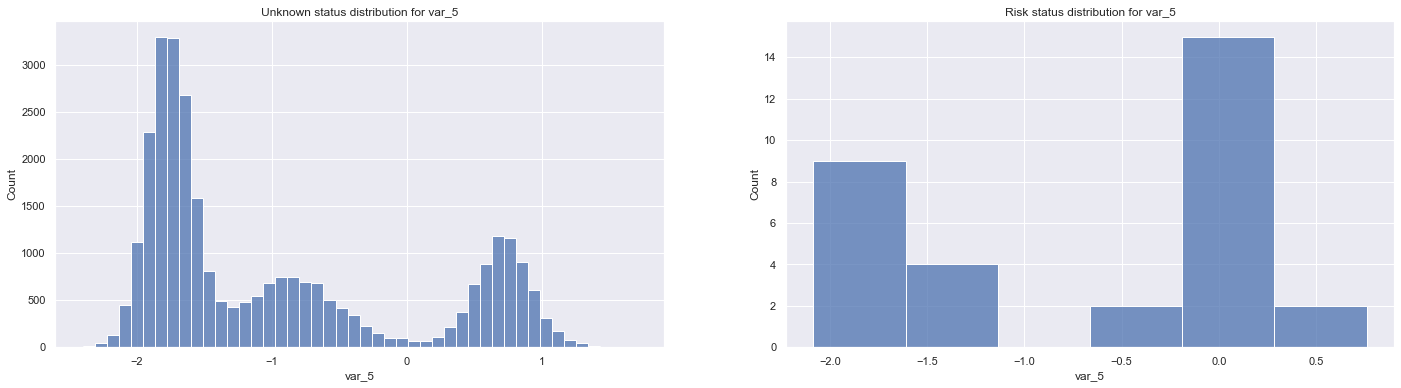

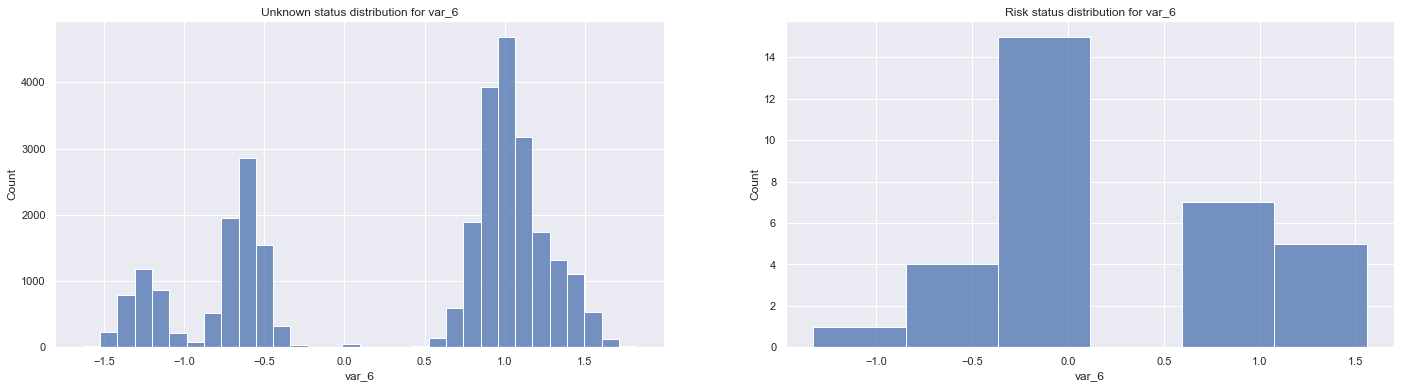

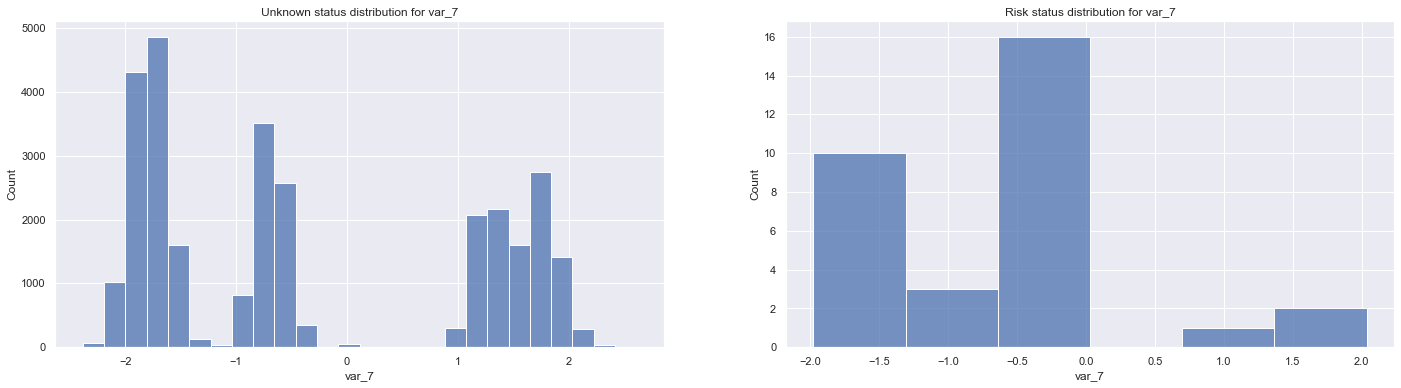

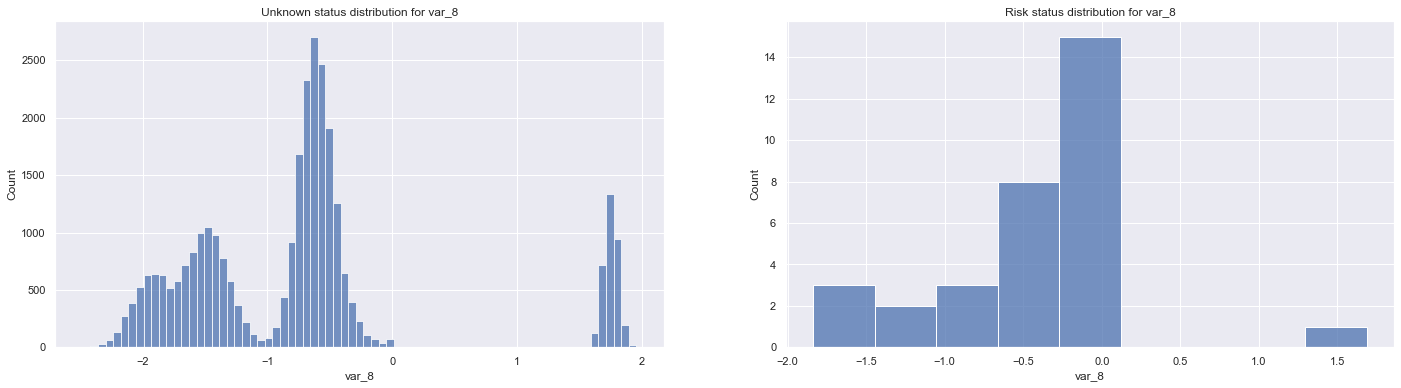

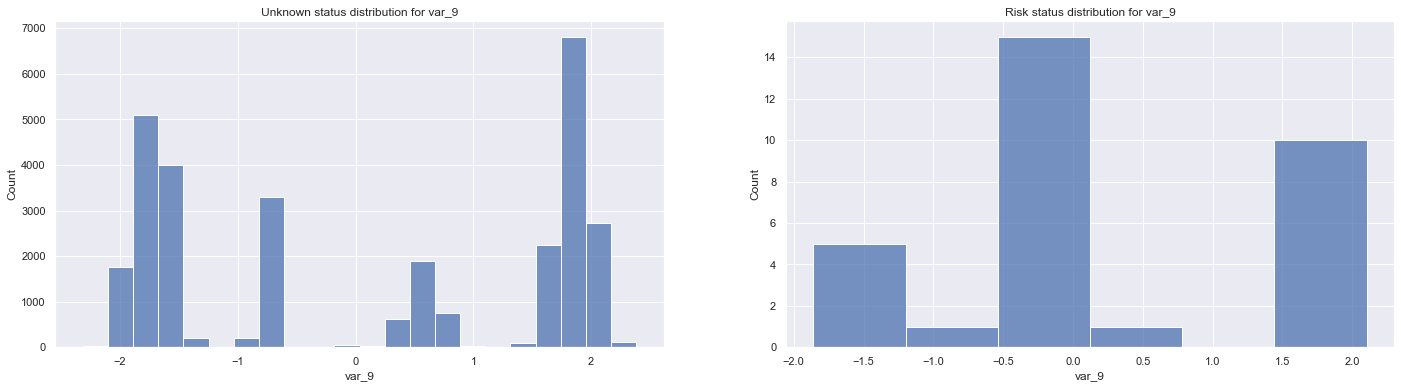

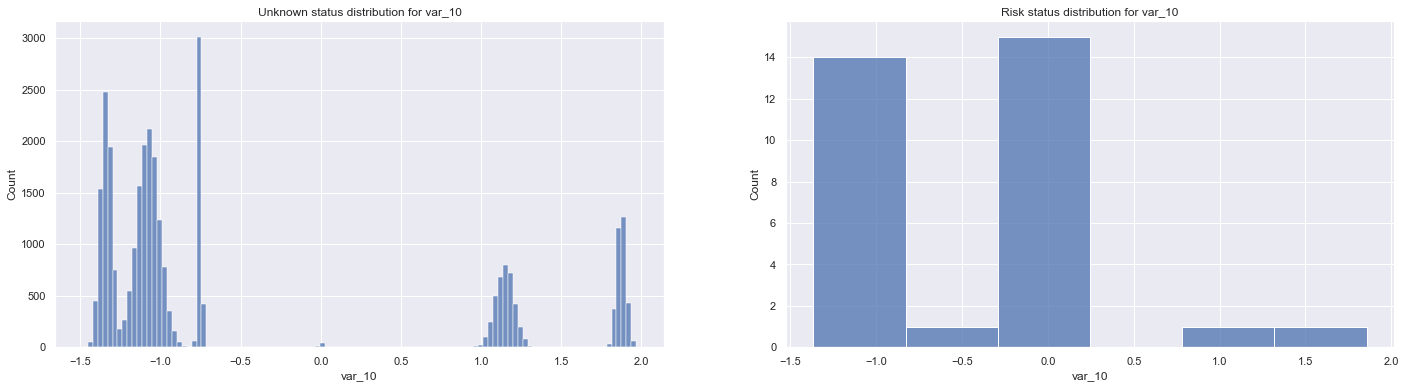

In [50]:

from scipy import stats
def make_hist_plots(data_unknown, data_risk):
    for var in data_unknown.columns:
        if var != 'is_cyber_risk':
            f, axes = plt.subplots(1, 2)
            axes[0].set_title(f'Unknown status distribution for {var}')
            axes[1].set_title(f'Risk status distribution for {var}')

            sns.histplot(data_unknown[var], ax = axes[0])
            sns.histplot(data_risk[var], ax = axes[1])
            plt.show()

make_hist_plots(data_status_unknown, data_risk)

What can be noticed from the histplots above is that the anomalies have many more points (proportinally) around 0 in comparison with the distributions of the rest of the data.

In [51]:
def transform_data(df):
    for i in df.columns:
        if i != 'is_cyber_risk':
            df[i], _ = stats.boxcox(abs(df[i]))
    return df

#Box_cox transformation was tried to normalize the distribution of the variables, however it did not yield better results.

#data = transform_data(data)
#data_status_unknown = transform_data(data_status_unknown)
#data_risk = transform_data(data_risk)

<AxesSubplot:>

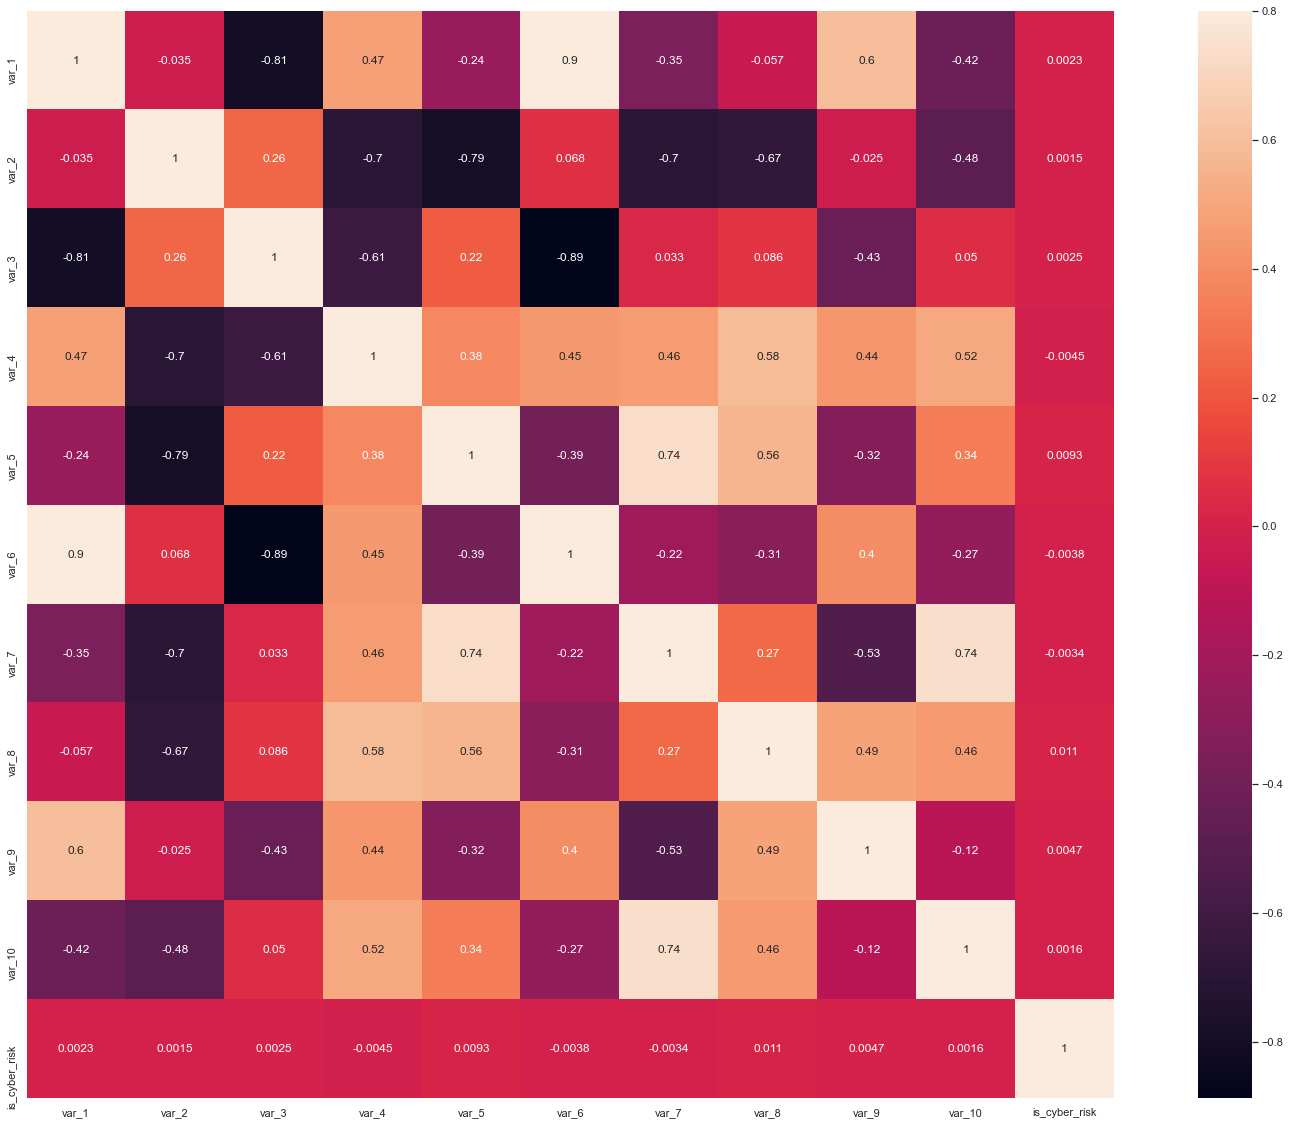

In [52]:
#Correlation heatmap for the features of the whole dataset
#We see some highly correlated features, such as var_1 and var_6, var_1 and var_3 negative correlated etc.
corr = data.corr() 

fig = plt.figure(figsize=(30,20))

sns.heatmap(corr, vmax=.8, square=True,annot=True)

<AxesSubplot:>

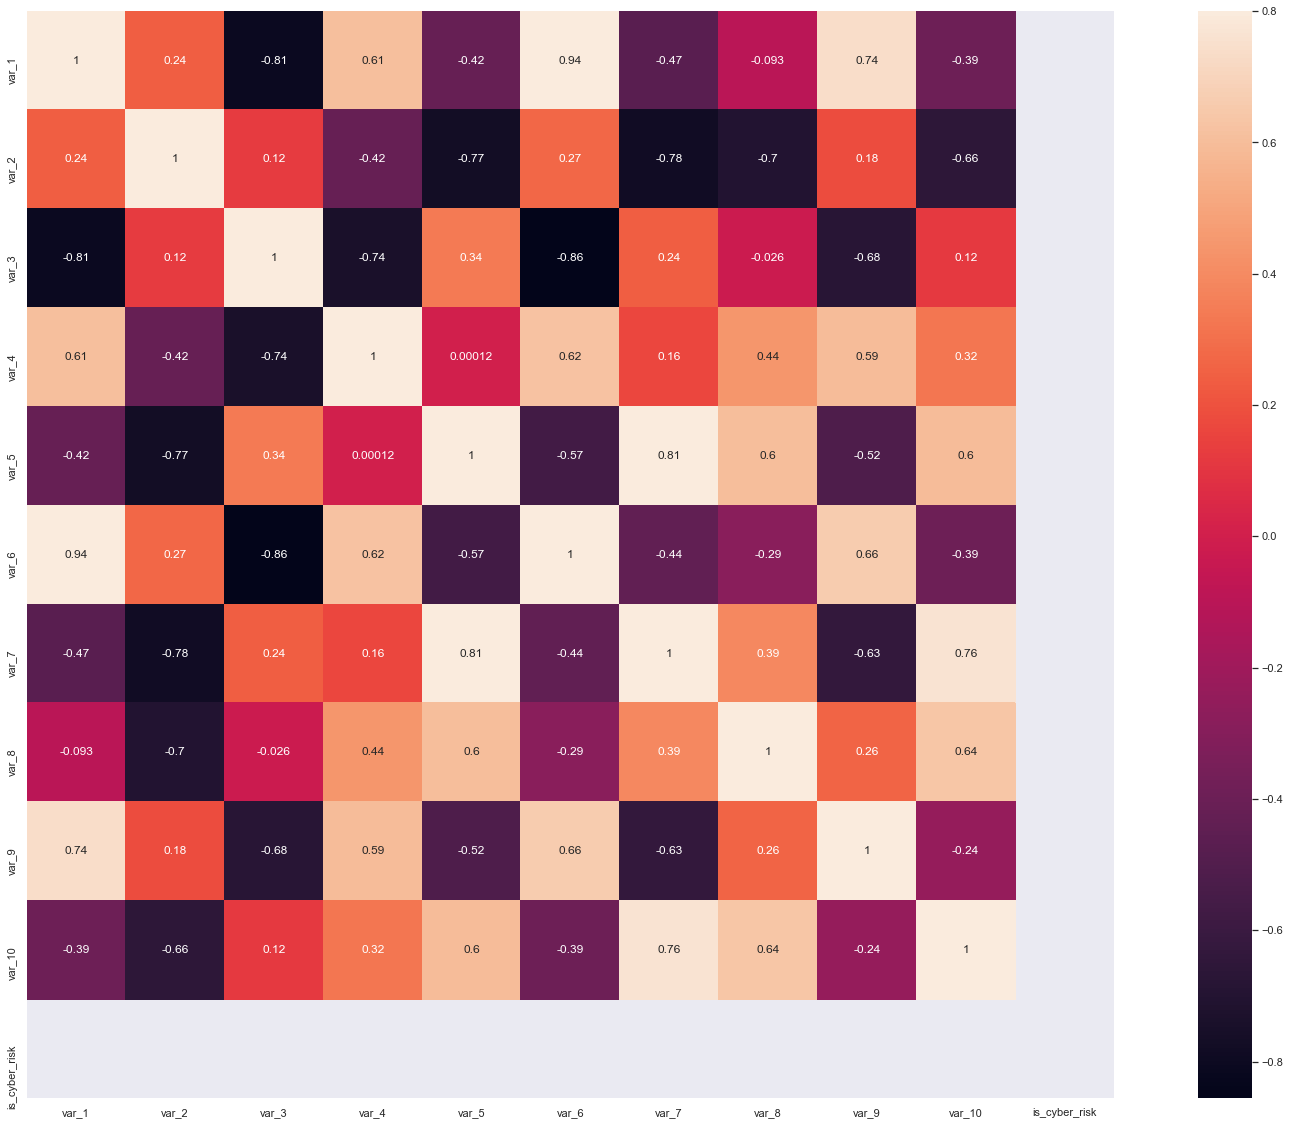

In [53]:
#Correlation heatmap for the features of the anomalous data points
#We notice that there is lower correlation between var_2 and var_4 in this graph, from -0.7 to -0.42 for anomalous data. 
#This will be incorporated as a feature later on.
corr = data_risk.corr() 

fig = plt.figure(figsize=(30,20))

sns.heatmap(corr, vmax=.8, square=True,annot=True)

### 3. Use of PCA for vizualisation in the 3-Dimensional space.

In [54]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
outliers=data.loc[data['is_cyber_risk']==1]
outlier_index=list(outliers.index)

X_reduce = pca.fit_transform(data.drop(columns=['is_cyber_risk']))
pca.explained_variance_ratio_.cumsum()
#We see that the 3 components maintain more than 90% of the variance of the original dataset, 
#which means that our conclusions from the 3D space are representative of the dataset.

array([0.41318815, 0.75835499, 0.90800398])

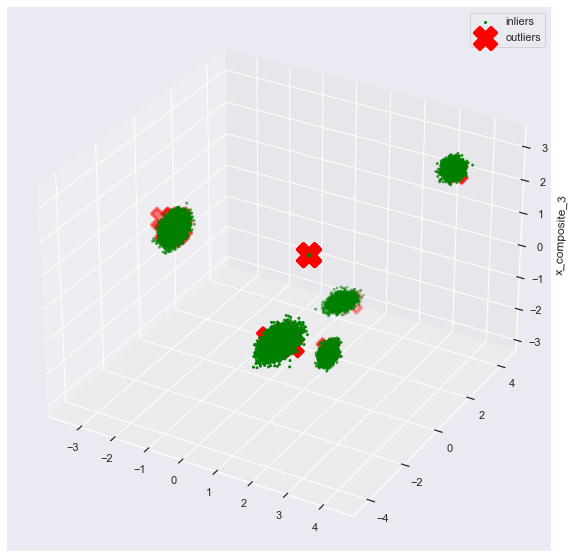

In [55]:

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=3, s=500, marker="X", c="red", label="outliers")
ax.legend()
plt.show()

In the image above we can see 5 distinct clusters. There are many outliers gathered at the (0,0,0) point away from the clusters.
The rest of the outliers seem to be close to the borders of the 5 clusters.

In [56]:
pca.components_

array([[-0.44965652, -0.14083829,  0.27567444, -0.07031242,  0.26360587,
        -0.27918423,  0.46261392,  0.04921029, -0.51589061,  0.25889199],
       [ 0.21132928, -0.37621466, -0.26512177,  0.53885228,  0.23536662,
         0.125771  ,  0.37012063,  0.30720306,  0.26093007,  0.28720697],
       [-0.30094516, -0.0158965 ,  0.3792114 , -0.04687057,  0.04026835,
        -0.36743759, -0.28164068,  0.48617599,  0.54587398,  0.11350017]])

In [57]:
len(outlier_index)

32

In [58]:
from sklearn.utils import shuffle
data_risk = shuffle(data_risk, random_state=50)
data_risk

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,is_cyber_risk
19317,-0.000577,0.008128,0.005013,0.004169,-0.006962,0.006848,-0.004105,-0.005543,0.007001,0.001211,1.0
9823,1.427904,1.352151,-0.311033,0.835414,-1.707161,1.230456,-1.637342,-0.730247,1.685298,-1.109030,1.0
25809,-2.524371,-1.669618,0.655939,1.366899,0.367543,-1.328959,1.675713,1.687132,0.496705,1.857508,1.0
11594,1.397756,0.911762,-0.523771,0.732882,-1.602412,1.092394,-1.486128,-0.385670,2.060060,-1.057410,1.0
19318,-0.004531,0.005852,-0.006187,0.000904,-0.002726,-0.009832,-0.003757,-0.008342,0.002449,-0.008854,1.0
19327,0.003221,-0.003536,0.006339,0.002331,-0.006485,0.009453,-0.001060,-0.003419,-0.003478,0.008117,1.0
19358,0.005718,-0.002335,0.004285,0.004652,0.007650,-0.000963,0.005167,0.002353,-0.001201,-0.008330,1.0
19314,-0.000948,-0.005205,-0.005363,-0.003475,-0.005928,0.008631,-0.005930,0.006394,0.000293,-0.004072,1.0
29669,1.742897,-1.669372,-1.715884,2.116821,0.761740,1.558989,2.035991,-0.480693,-0.698615,-0.762434,1.0
19346,0.006815,0.008821,-0.001754,0.004457,-0.003589,0.000398,0.001926,-0.003464,-0.005883,0.007109,1.0


### 4. Anomaly Detection with Isolation Forest

We have an anomaly detection problem since we only know a fraction of the labels as anomalous 32/30000 = 0.107%. I will use the data with unknown status for training an Isolation Forest algorithm. The 32 known anomalous events will be split between the validation and the test set, 16 each. The metric that we will use is recall, since we want to capture as many of the anomalies as possible because they represent cyber attacks and the cost of not diagnosing them is high. The validation set will be used for tuning the parameters and the test set will be the real world expected performance of the algorithm. Of course our known anomalies are few so the real recall rate may differ from the observed one. I assume that the total number of anomalies does not exceed 1% of the data points.

In [59]:
X = data_status_unknown.drop('is_cyber_risk', axis=1)
y = data_status_unknown['is_cyber_risk']

half_num_points = int(data_risk.shape[0]/2)  # 16 data points for the validation and test set each

from sklearn.model_selection import train_test_split
#Training set has only non known status data. We create a separate validation and test set each with 5% non anomalous data and 
#half of the known anomalous points.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

X_val = pd.concat([X_val, data_risk.iloc[0:half_num_points].drop('is_cyber_risk', axis=1)])
y_val = pd.concat([y_val, data_risk['is_cyber_risk'].iloc[0:half_num_points]])
X_test = pd.concat([X_test, data_risk.iloc[half_num_points:].drop('is_cyber_risk', axis=1)])
y_test = pd.concat([y_test, data_risk['is_cyber_risk'].iloc[half_num_points:]])

data_risk

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,is_cyber_risk
19317,-0.000577,0.008128,0.005013,0.004169,-0.006962,0.006848,-0.004105,-0.005543,0.007001,0.001211,1.0
9823,1.427904,1.352151,-0.311033,0.835414,-1.707161,1.230456,-1.637342,-0.730247,1.685298,-1.109030,1.0
25809,-2.524371,-1.669618,0.655939,1.366899,0.367543,-1.328959,1.675713,1.687132,0.496705,1.857508,1.0
11594,1.397756,0.911762,-0.523771,0.732882,-1.602412,1.092394,-1.486128,-0.385670,2.060060,-1.057410,1.0
19318,-0.004531,0.005852,-0.006187,0.000904,-0.002726,-0.009832,-0.003757,-0.008342,0.002449,-0.008854,1.0
19327,0.003221,-0.003536,0.006339,0.002331,-0.006485,0.009453,-0.001060,-0.003419,-0.003478,0.008117,1.0
19358,0.005718,-0.002335,0.004285,0.004652,0.007650,-0.000963,0.005167,0.002353,-0.001201,-0.008330,1.0
19314,-0.000948,-0.005205,-0.005363,-0.003475,-0.005928,0.008631,-0.005930,0.006394,0.000293,-0.004072,1.0
29669,1.742897,-1.669372,-1.715884,2.116821,0.761740,1.558989,2.035991,-0.480693,-0.698615,-0.762434,1.0
19346,0.006815,0.008821,-0.001754,0.004457,-0.003589,0.000398,0.001926,-0.003464,-0.005883,0.007109,1.0


In [60]:
X_test.tail(16)

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
19353,0.005431,0.006671,0.007873,0.009693,0.007185,0.001471,0.004545,-0.008537,-0.006175,-0.004836
19305,0.003937,-0.005262,-0.008710,0.008311,0.003923,-0.005261,-0.008089,0.000724,0.003606,0.005812
8661,1.639094,1.014128,-0.450185,0.502865,-1.700597,1.113817,-1.688229,-0.660411,1.815947,-1.038075
2599,0.700547,0.580528,-1.216279,0.386545,-1.774452,0.890297,-1.908047,-0.705892,1.738409,-1.065879
19348,0.008231,0.001797,-0.007897,-0.007907,-0.001494,0.001628,0.002237,0.009363,0.004108,-0.005031
19362,-0.001262,-0.003781,-0.008276,0.004684,-0.002778,-0.001699,0.006282,-0.009239,0.005659,-0.006006
19343,0.005013,0.000147,-0.006225,-0.007278,-0.005185,0.004079,0.001619,-0.009186,-0.006322,0.002659
19352,0.001493,-0.006816,0.000475,0.005168,0.003113,0.005464,0.004531,0.003955,-0.008673,-0.000167
7444,2.022398,1.218687,-0.400664,0.806907,-1.702247,1.143007,-1.735055,-0.447819,2.104412,-1.076500
7686,1.094549,0.824830,-0.404460,0.552493,-1.877858,1.032946,-1.725885,-0.474928,2.043030,-1.192855


In [61]:
def grid_search_validation(X, X_train, y):
    split_index = [-1 if x in X_train.index else 0 for x in X.index]

    # Use the list to create PredefinedSplit
    pds = PredefinedSplit(test_fold = split_index)

    # Use PredefinedSplit in GridSearchCV
    grid_search = GridSearchCV(estimator = IsolationForest(random_state=42, n_jobs=-1),
                   cv=pds,
                   scoring='recall_micro',
                   param_grid=param_grid)

    # Fit with all data
    grid_search.fit(X,y.fillna(0))
    print(grid_search.cv_results_)

In [62]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import recall_score

param_grid = {'n_estimators': [50, 100, 200, 300], 
              'contamination': [0.005, 0.01, 0.03] 
              #'bootstrap': [True, False]
              }
#grid_search_validation(X, X_train, y)
                       
#We will select the highest recall model and low contamination, since we do not expect many anomalies.                             
clf = IsolationForest(n_estimators=200, contamination=0.01, n_jobs=-1, random_state=42)

clf.fit(X_train)
pred_train = clf.predict(X_train)
pred_val = clf.predict(X_val)
recall_val = recall_score(y_val[-16:], -pred_val[-16:])
print(f'Recall on the validation set: {recall_val}')

Recall on the validation set: 0.5


In [63]:
d = clf.predict(X_train)
unique, counts = np.unique(d, return_counts=True)
dict(zip(unique, counts))
# From the training set 270 instances were identified as anomalous, or 1% which is our assumption

{-1: 270, 1: 26701}

In [64]:
pred_test = clf.predict(X_test)
recall_test = recall_score(y_test[-16:], -pred_test[-16:])
print(f'Recall on the test set: {recall_test}')
#clf.score_samples(X_test[-100:])

Recall on the test set: 0.4375


Let's examine which cases our algorithm identifies correctly

In [65]:
idx = y_val[-16:].index[y_val[-16:] == -pred_val[-16:]]

In [66]:
X_val[X_val.index.isin(idx)]

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
19317,-0.000577,0.008128,0.005013,0.004169,-0.006962,0.006848,-0.004105,-0.005543,0.007001,0.001211
19318,-0.004531,0.005852,-0.006187,0.000904,-0.002726,-0.009832,-0.003757,-0.008342,0.002449,-0.008854
19327,0.003221,-0.003536,0.006339,0.002331,-0.006485,0.009453,-0.001060,-0.003419,-0.003478,0.008117
19358,0.005718,-0.002335,0.004285,0.004652,0.007650,-0.000963,0.005167,0.002353,-0.001201,-0.008330
19314,-0.000948,-0.005205,-0.005363,-0.003475,-0.005928,0.008631,-0.005930,0.006394,0.000293,-0.004072
19346,0.006815,0.008821,-0.001754,0.004457,-0.003589,0.000398,0.001926,-0.003464,-0.005883,0.007109
19341,0.003148,0.001826,0.007959,-0.004359,-0.000029,0.008691,0.001506,-0.003301,-0.009537,0.004242
19301,0.004145,0.005354,-0.004398,0.005601,0.004905,0.009486,-0.008990,-0.002861,-0.000849,-0.003746


In [67]:
idx_test = y_test[-16:].index[y_test[-16:] == -pred_test[-16:]]
X_test[X_test.index.isin(idx_test)]

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
19353,0.005431,0.006671,0.007873,0.009693,0.007185,0.001471,0.004545,-0.008537,-0.006175,-0.004836
19305,0.003937,-0.005262,-0.008710,0.008311,0.003923,-0.005261,-0.008089,0.000724,0.003606,0.005812
19348,0.008231,0.001797,-0.007897,-0.007907,-0.001494,0.001628,0.002237,0.009363,0.004108,-0.005031
19362,-0.001262,-0.003781,-0.008276,0.004684,-0.002778,-0.001699,0.006282,-0.009239,0.005659,-0.006006
19343,0.005013,0.000147,-0.006225,-0.007278,-0.005185,0.004079,0.001619,-0.009186,-0.006322,0.002659
19352,0.001493,-0.006816,0.000475,0.005168,0.003113,0.005464,0.004531,0.003955,-0.008673,-0.000167
19310,0.001237,0.001053,0.001966,0.008724,0.007440,0.001494,-0.007146,0.001158,-0.008691,-0.003983


So we notice that the algorithm identifies correctly the 0 points as anomalous, however it fails to identify the rest as anomalous because they are very close to the clusters of status unknown data.

Let's vizualise the predictions.

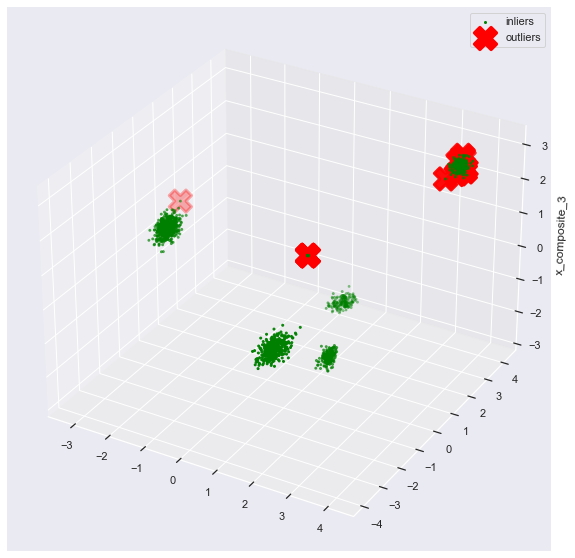

In [68]:
X_reduce = pca.transform(X_val)
preds = pd. DataFrame(pred_val, columns=['Prediction'])
outliers=preds[preds['Prediction']==-1]
outlier_index=list(outliers.index)
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=3, s=500, marker="X", c="red", label="outliers")
ax.legend()
plt.show()

In [69]:
import pickle
#Saving model
filename = 'finalized_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

### 5. Approach with more feature engineering

We saw earlier the 2 correlation plots, for non-known and anomalous data. What we could observe is that in the case of anomalous data there was lower negative correlation between var_2 and var_4 than in the non-anomalous data. Therefore I will engineer an extra feature, trying to give high values to anomalies. For that reason I will divide var_2 with the square of var_4 and subsequently remove var_4 from our features.

In [70]:
def create_features(df):
    df['var_2'] = df['var_2'] / df['var_4']**2
    df.drop(columns=['var_4'], axis=1, inplace=True)
    return df

In [71]:
#X = create_features(X)
X_train = create_features(X_train.copy())
X_val = create_features(X_val.copy())
X_test = create_features(X_test.copy())

In [72]:
clf = IsolationForest(n_estimators=200, contamination=0.03, n_jobs=-1, random_state=101)

clf.fit(X_train)
pred_train = clf.predict(X_train)
pred_val = clf.predict(X_val)
recall_val = recall_score(y_val[-16:], -pred_val[-16:])
print(f'Recall on the validation set: {recall_val}')

Recall on the validation set: 0.5625


In [73]:
pred_test = clf.predict(X_test)
recall_test = recall_score(y_test[-16:], -pred_test[-16:])
print(f'Recall on the test set: {recall_test}')

Recall on the test set: 0.4375


In [74]:
idx = y_val[-16:].index[y_val[-16:] == -pred_val[-16:]]
X_val[X_val.index.isin(idx)]

,var_1,var_2,var_3,var_5,var_6,var_7,var_8,var_9,var_10
19317,-0.000577,467.781446,0.005013,-0.006962,0.006848,-0.004105,-0.005543,0.007001,0.001211
25809,-2.524371,-0.893602,0.655939,0.367543,-1.328959,1.675713,1.687132,0.496705,1.857508
19318,-0.004531,7164.747848,-0.006187,-0.002726,-0.009832,-0.003757,-0.008342,0.002449,-0.008854
19327,0.003221,-650.697273,0.006339,-0.006485,0.009453,-0.001060,-0.003419,-0.003478,0.008117
19358,0.005718,-107.887691,0.004285,0.007650,-0.000963,0.005167,0.002353,-0.001201,-0.008330
19314,-0.000948,-431.004080,-0.005363,-0.005928,0.008631,-0.005930,0.006394,0.000293,-0.004072
19346,0.006815,444.001235,-0.001754,-0.003589,0.000398,0.001926,-0.003464,-0.005883,0.007109
19341,0.003148,96.124649,0.007959,-0.000029,0.008691,0.001506,-0.003301,-0.009537,0.004242
19301,0.004145,170.641176,-0.004398,0.004905,0.009486,-0.008990,-0.002861,-0.000849,-0.003746


So, with the new approach the algorithm identified one extra point from the validation set correctly as anomalous, at the expense of increasing the threshold of contamination to 3% of the todal data.